## Scraping of AFI pubs from USAF E-Pub Site


In [2]:
import os
import requests

INSTR_PATH = os.path.join(os.getcwd(),"afi")
try:
    os.mkdir(INSTR_PATH)
except:
    pass

In [3]:
def save_file(url):
    fname = url.split("/")[-1]
    fpath = os.path.join(INSTR_PATH, fname)
    # check if already downloaded
    if not os.path.isfile(fpath):
        try:
            response = requests.get(url, stream=True)
            response.raise_for_status()
            with open(fpath, 'wb') as handle:
                for block in response.iter_content(1024):
                    handle.write(block)
        except Exception as e:
            print(e)
            pass
    else:
        print("Skipping {}".format(fpath))

## The USAF E-Pub site uses Javascript so.. we need to scrape with Selenium + phantomjs

### Selenium allows us to create a simple crawler that navigates their website and discovers the AF pub links we want.
### phantomjs is a headless browser

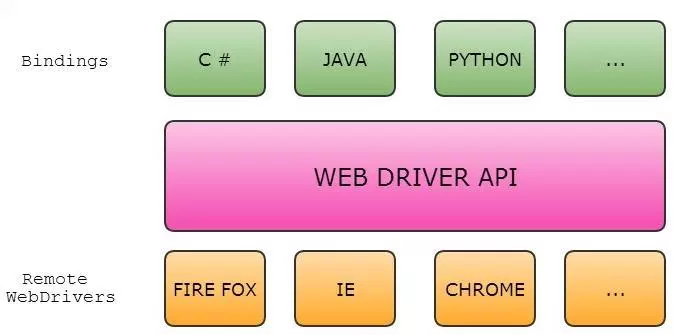

In [4]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep

driver = webdriver.PhantomJS(executable_path='/usr/local/phantomjs/bin/phantomjs')
driver.implicitly_wait(0.5)


### We have to tell our crawler where to start - these are the links we want.

http://www.e-publishing.af.mil/#/?view=pubs&orgID=10141&catID=1&series=-1&modID=449&tabID=71

In [14]:
url = 'http://www.e-publishing.af.mil/#/?view=pubs&orgID=10141&catID=1&series=-1&modID=449&tabID=71'
driver.get(url)

### Here we tell the crawler how to discover more search results and detect when it is done.

In [6]:
def get_links():
    table = driver.find_element_by_id('data')
    links = table.find_elements_by_css_selector('a')
    return [link.get_attribute('href') for link in links]

def get_next_button():
    pagination_buttons = driver.find_element_by_id('data_paginate').find_elements_by_css_selector('a.paginate_button')
    hidden_next_button = pagination_buttons[-1]
    if 'disabled' in hidden_next_button.get_attribute('class'):
        return None
    for elem in pagination_buttons:
        if 'current' in elem.get_attribute('class'):
            next_idx = pagination_buttons.index(elem)+1
            #print("found next at {}".format(next_idx))
            return pagination_buttons[next_idx]

### Tie it all together..

In [13]:
def crawl():
    # Start with initial links..
    links = []
    links += get_links()
    
    # Loop until it thinks it is done
    while True:
        nextbutton = get_next_button()
        if nextbutton:
            nextbutton.click()
            links += get_links()
        else:
            return links


## Now we can download all the documents

In [8]:
all_links = crawl()

In [12]:
[save_file(link) for link in all_links]

Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afgm2015-33-03.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afgm2016-16-703v1.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afgm2017-10-01.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afgm2017-17-01.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afgm2017-32-01.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afgm2017-32-02.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afgm2017-36-01.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afgm2017-36-02.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afgm2017-36-03.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afgm2017-36-04.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afgm2017-90-01.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afh10-222v1.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afh10-222v10.pdf


Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2855.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2856.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2862.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2863.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2864.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2868.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2869.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2870.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi_36-2871.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2872.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2901.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2903.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2905.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/afi36-2906.pdf
Skipping /home/brian/usaf_instructiondestructio

404 Client Error: Not Found for url: http://static.e-publishing.af.mil/
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
404 Client Error: Not Found for url: http://static.e-publishing.af.mil/
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pdf
Skipping /home/brian/usaf_instructiondestruction/afi/physical.pd

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [9]:
print("We downloaded {} files".format(len(all_links)))

We downloaded 2158 files


### Intermediate PDF -> txt not shown.. uninteresting.. here's a file

In [15]:
with open('/home/brian/usaf_instructiondestruction/afi_txt/afh10-222v14.txt') as fp:
    print(fp.read())

                                              CIVIL ENGINEER GUIDE TO FIGHTING POSITIONS, SHELTERS, OBSTACLES, AND REVETMENTS     AIR FORCE HANDBOOK 10-222, VOLUME 14       1 August 2008           DEPARTMENT OF THE AIR FORCE               This Page Intentionally Left Blank         AIR FORCE HANDBOOK 10-222, VOLUME 14                1 August 2008 BY ORDER OF THE SECRETARY OF THE AIR FORCE                                                                                              Certified Current, 8 March 2012                                                                                                           Operations  CIVIL  ENGINEER  GUIDE  TO  FIGHTING  POSITIONS,  SHELTERS, OBSTACLES, AND REVETMENTS ______________________________________________________________ ACCESSIBILITY: This publication is available on the e-Publishing website at http://www.e-publishing.af.mil for downloading and ordering.  RELEASABILITY: There are no releasability restrictions. _____________________